<div style="text-align: center;">
   <font size="5"> 線形代数(Linear Algebra I) </font>
</div>
   <div style="text-align: right;">
   <font size="3"> cc by Shigeto R. Nishitani, 2018-03-15 </font>
</div>

* file: /Users/bob/python/doing_math_with_python/linear_algebra/LA-I.ipynb

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#LU-分解" data-toc-modified-id="LU-分解-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LU 分解</a></div><div class="lev1 toc-item"><a href="#連立方程式，掃き出しとplot" data-toc-modified-id="連立方程式，掃き出しとplot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>連立方程式，掃き出しとplot</a></div><div class="lev2 toc-item"><a href="#拡大係数行列の作成と掃き出し(LU分解)" data-toc-modified-id="拡大係数行列の作成と掃き出し(LU分解)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>拡大係数行列の作成と掃き出し(LU分解)</a></div><div class="lev2 toc-item"><a href="#3次元の連立方程式の意味とplot" data-toc-modified-id="3次元の連立方程式の意味とplot-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>3次元の連立方程式の意味とplot</a></div>

# LU 分解

連立方程式を解くときには，**ガウスの掃き出し法(Gaussian elimination)**が利用される．
これはalgorithmとしてはlower, upper triangle matrixに
分ける操作から**LU分解(LU decomposition)**と呼ばれる．

* **階段行列(echelon form)**は左側に連続して0が並んでいて，行とともにその数が増えていく行列
* r+1以下の行の成分が全て0であるとき，**階数(rank)**がrであるという．
* **係数行列**$A$，**拡大係数行列**$[Ab]$
* 連立一次方程式，
* 解の存在定理$rank[Ab]=rank A$
* $n$次正方行列が**正則(regular)**，**次数**と階数が一致する行列$rank A = n$．連立方程式がただ1組の解を持つ条件．
* **同次連立一次方程式**　$Ax = 0$
* **自明解**$x=0$，**非自明解**$x \neq 0$，
* 連立方程式$Ax=b$の**一般解**$x$について，$x=x_0+\alpha x_1+\beta x_2$としたときの$x_0$が**特殊解**，$x_1, x_2$は**同伴な同次連立方程式**$Ax=0$の**基本解**．$x$はそれらの**線型結合(linear combination)**で表されている．

# 連立方程式，掃き出しとplot

![LA-I](./figs/LinearAlgebra-I.png)

## 拡大係数行列の作成と掃き出し(LU分解)

In [1]:
import numpy as np
import scipy.linalg
np.set_printoptions(precision=3, suppress=True)
a=np.array([[1,1],[2,4]])
print(a)
P, L, U = scipy.linalg.lu(a)
print(P)
print(L)
print(U)

[[1 1]
 [2 4]]
[[ 0.  1.]
 [ 1.  0.]]
[[ 1.   0. ]
 [ 0.5  1. ]]
[[ 2.  4.]
 [ 0. -1.]]


In [2]:
a=np.array([[1,1],[2,4]])
b = np.array([5,18])
ab = np.column_stack((a,b))
P, L, U = scipy.linalg.lu(ab)
print(P)
print(L)
print(U)

[[ 0.  1.]
 [ 1.  0.]]
[[ 1.   0. ]
 [ 0.5  1. ]]
[[  2.   4.  18.]
 [  0.  -1.  -4.]]


## 3次元の連立方程式の意味とplot
例えば，次のような連立方程式を解くと
$$
x - y -z = 1 \\
x - y +z = -1 \\
x + y -z = -1
$$

In [3]:
a=np.array([[1,-1,-1],[1,-1,1],[1,1,-1]])
b = np.array([1,-1,-1])
ab = np.column_stack((a,b))
P, L, U = scipy.linalg.lu(ab)
#print(P)
#print(L)
print(U)

[[ 1. -1. -1.  1.]
 [ 0.  2.  0. -2.]
 [ 0.  0.  2. -2.]]


In [4]:
a=np.array([[1,-1,-1],[1,-1,1],[1,1,-1]])
b = np.array([1,-1,-1])
scipy.linalg.inv(a).dot(b)

array([-1., -1., -1.])

となり，
$$
x=-1, y=-1, z=-1
$$
が得られる．これの意味はつぎのように理解できる．

まず，先ほどの連立方程式を$z$について形式的に解く．すると，
$$
z = x - y - 1 \\
z = -1-x+y \\
z = 1+x+y
$$
となる．これをplot3dしてみると次の通り，表示される．

<IPython.core.display.Javascript object>


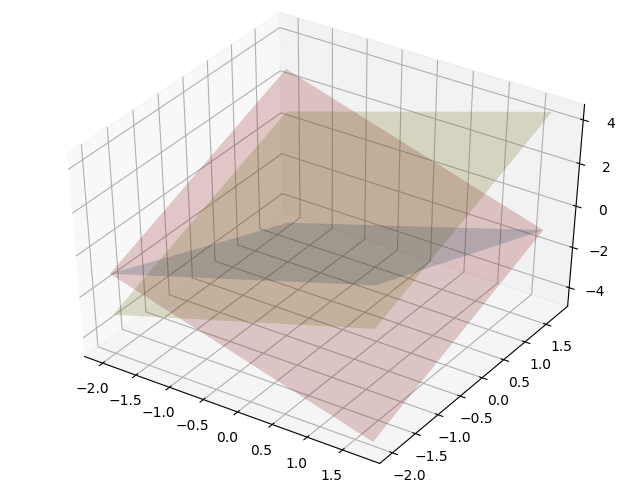

In [5]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    return  x - y - 1
def g(x,y):
    return -1-x+y
def h(x,y):
    return 1+x+y

x = np.arange(-2, 2, 0.25)
y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(x, y)
Z1 = f(X,Y)
Z2 = g(X,Y)
Z3 = h(X,Y)

fig = plt.figure()
plot3d = Axes3D(fig)
plot3d.plot_surface(X,Y,Z1, alpha = 0.2) 
plot3d.plot_surface(X,Y,Z2, color='r', alpha = 0.2) 
plot3d.plot_surface(X,Y,Z3, color='y', alpha = 0.2) 

plt.show()

# x=0.439423 , y=2.21846 , z=-7.77475

pythonのplot3dではrenderingがちゃんとできてないので，見にくいが，
ちゃんとrenderingしてくれる画像でみると，
1. それぞれの方程式が表す面が表示され，
1. 面同士がintersectするところが直線をなし．
1. それらが交わった点が$x=-1, y=-1, z=-1$
であることがわかると思う．

3次元のちゃんとしたrenderingにはmayaviを使えというお達しだが，
> pip install mayavi

でやってもvtkが入ってないとかで怒られる．これは諦める．
そうなると，3dplotが貧弱だが，まあ，仕方ないか．

Mapleの優位さを宣伝する部分だね．

![three_planes_plot](./figs/three_planes_plot.png)

sagaを使えということか．．．そうなるとまた，教研でinstallしなあかんのが増えるな．